In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import datetime as dt
import re
from datetime import timedelta, datetime
import scipy as sp
import scipy.stats as stats
import shap
import gc
import os
import sys
import pickle
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 100)

source_folder = os.getcwd()
path_save = os.path.join(source_folder, 'Data')

sep = r'/'

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
df = pd.read_csv(path_save+sep+'eras_comparison.csv',
                sep=',', encoding='latin-1')

In [3]:
df.columns

Index(['Rk', 'Season', 'Lg', 'Age', 'Ht', 'Wt', 'G', 'MP', 'FG', 'FGA', '3P',
       '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'FG%', '3P%', 'FT%', 'Pace', 'eFG%', 'TOV%', 'ORB%',
       'FT/FGA', 'ORtg', 'TS%'],
      dtype='object')

In [4]:
df

,Rk,Season,Lg,Age,Ht,Wt,G,MP,FG,FGA,...,FG%,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg,TS%
0,1,2024-25,NBA,26.3,6-7,215.0,1215,241.2,41.7,89.2,...,0.467,0.360,0.780,98.9,0.543,12.6,25.2,0.190,114.6,0.576
1,2,2023-24,NBA,26.4,6-7,216.0,1230,241.4,42.2,88.9,...,0.474,0.366,0.784,98.5,0.547,12.1,24.2,0.192,115.3,0.580
2,3,2022-23,NBA,26.1,6-6,216.0,1230,241.8,42.0,88.3,...,0.475,0.361,0.782,99.2,0.545,12.5,24.0,0.208,114.8,0.581
3,4,2021-22,NBA,26.1,6-6,215.0,1230,241.4,40.6,88.1,...,0.461,0.354,0.775,98.2,0.532,12.3,23.2,0.192,112.0,0.566
4,5,2020-21,NBA,26.1,6-6,217.0,1080,241.4,41.2,88.4,...,0.466,0.367,0.778,99.2,0.538,12.4,22.2,0.192,112.3,0.572
5,6,2019-20,NBA,26.1,6-6,218.0,1059,241.8,40.9,88.8,...,0.460,0.358,0.773,100.3,0.529,12.8,22.5,0.201,110.6,0.565
6,7,2018-19,NBA,26.3,6-6,219.0,1230,241.6,41.1,89.2,...,0.461,0.355,0.766,100.0,0.524,12.4,22.9,0.198,110.4,0.560
7,8,2017-18,NBA,26.4,6-7,220.0,1230,241.4,39.6,86.1,...,0.460,0.362,0.767,97.3,0.521,13.0,22.3,0.193,108.6,0.556
8,9,2016-17,NBA,26.6,6-7,221.0,1230,241.6,39.0,85.4,...,0.457,0.358,0.772,96.4,0.514,12.7,23.3,0.209,108.8,0.552
9,10,2015-16,NBA,26.7,6-7,222.0,1230,241.8,38.2,84.6,...,0.452,0.354,0.757,95.8,0.502,13.2,23.8,0.209,106.4,0.541


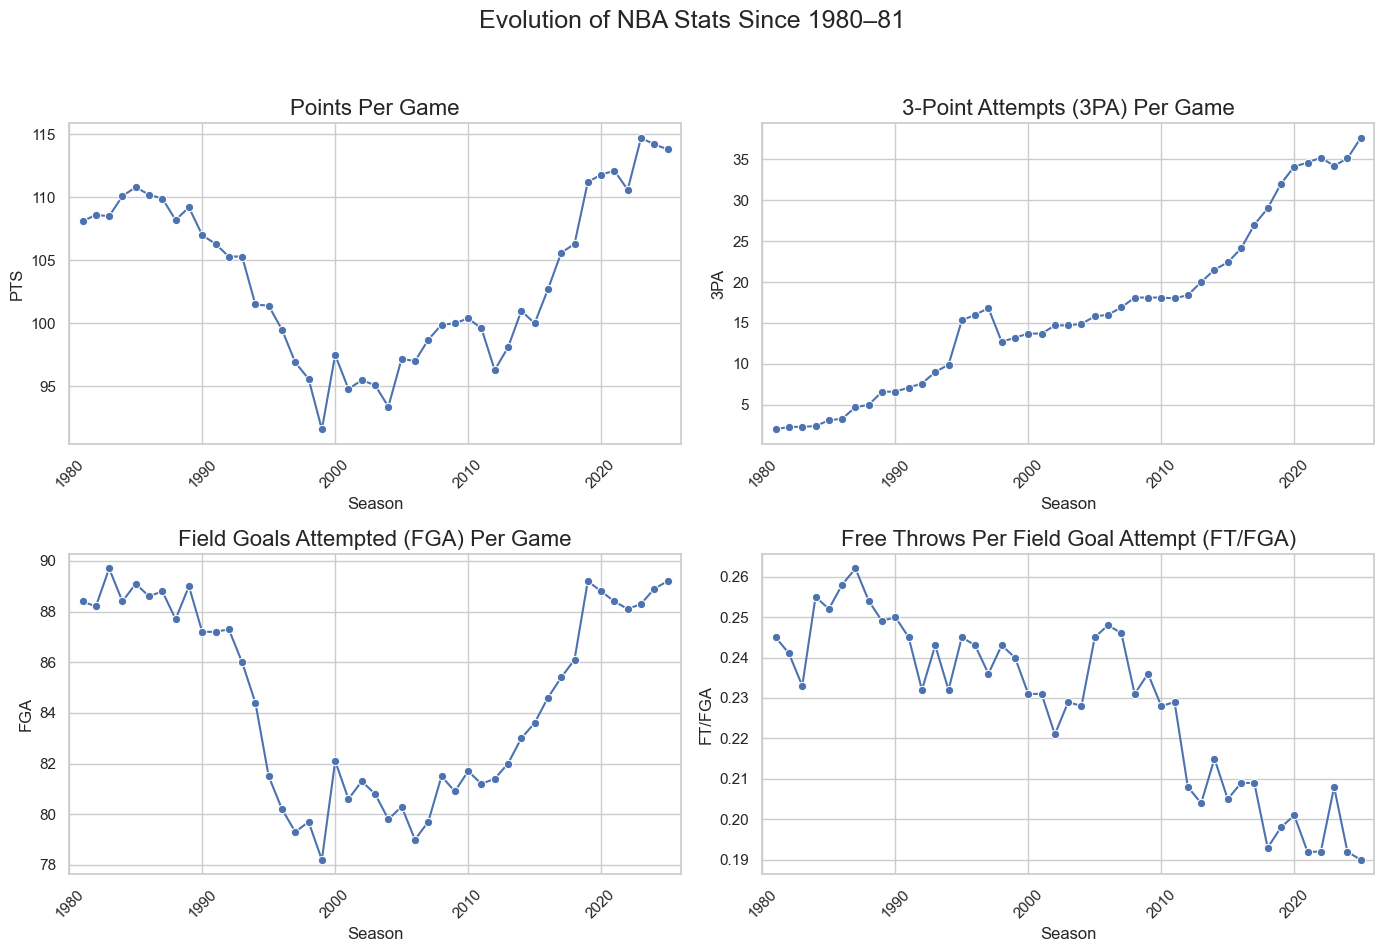

In [5]:
# Optional: seaborn styling
sns.set(style="whitegrid")

# Convert 'Season' to a starting year (e.g., '1970-71' → 1971)
df['Season_start'] = df['Season'].str[:4].astype(int) + 1

# Filter from 1981 onward
df = df[df['Season_start'] >= 1981].sort_values('Season_start')

# Set up 2x2 grid of plots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Evolution of NBA Stats Since 1980–81', fontsize=18)

# PTS
sns.lineplot(ax=axs[0, 0], x='Season_start', y='PTS', data=df, marker='o')
axs[0, 0].set_title('Points Per Game', fontsize=16)

# 3PA
sns.lineplot(ax=axs[0, 1], x='Season_start', y='3PA', data=df, marker='o')
axs[0, 1].set_title('3-Point Attempts (3PA) Per Game', fontsize=16)

# FGA
sns.lineplot(ax=axs[1, 0], x='Season_start', y='FGA', data=df, marker='o')
axs[1, 0].set_title('Field Goals Attempted (FGA) Per Game', fontsize=16)

# FT/FGA
sns.lineplot(ax=axs[1, 1], x='Season_start', y='FT/FGA', data=df, marker='o')
axs[1, 1].set_title('Free Throws Per Field Goal Attempt (FT/FGA)', fontsize=16)

# Set x-axis labels and limits
x_min = 1980
x_max = df['Season_start'].max()+1

for ax in axs.flat:
    ax.set_xlabel('Season')
    ax.set_xlim([x_min, x_max])
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(path_save+sep+'nba_stats_evolution.png', dpi=300, bbox_inches='tight')
plt.show()